# ICC Men's Cricket World Cup 2023 Analysis

## Stadium Analysis

### 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Dataset

In [172]:
batting = pd.read_csv("batting_summary.csv")
bowling = pd.read_csv("bowling_summary.csv")
matches = pd.read_csv("match_schedule_results.csv")
players = pd.read_csv("world_cup_players_info.csv")

print(batting.head())
print(bowling.head())
print(matches.head())
print(players.head())

   Match_no           Match_Between Team_Innings    Batsman_Name  \
0         1  England vs New Zealand      England  Jonny Bairstow   
1         1  England vs New Zealand      England     Dawid Malan   
2         1  England vs New Zealand      England        Joe Root   
3         1  England vs New Zealand      England     Harry Brook   
4         1  England vs New Zealand      England       Moeen Ali   

   Batting_Position                            Dismissal  Runs  Balls  4s  6s  \
0                 1  c Daryl Mitchell b Mitchell Santner    33     35   4   1   
1                 2            c Tom Latham b Matt Henry    14     24   2   0   
2                 3                     b Glenn Phillips    77     86   4   1   
3                 4     c Devon Conway b Rachin Ravindra    25     16   4   1   
4                 5                     b Glenn Phillips    11     17   1   0   

  Strike_Rate  
0      94.300  
1      58.300  
2      89.500  
3     156.300  
4      64.700  
   Match

### 3. Data Cleaning

In [174]:
# 2. Data Cleaning
# Standardize column names (lowercase & remove spaces)
batting.columns = batting.columns.str.strip().str.lower()
bowling.columns = bowling.columns.str.strip().str.lower()
matches.columns = matches.columns.str.strip().str.lower()

# Remove duplicates
batting.drop_duplicates(inplace=True)
bowling.drop_duplicates(inplace=True)
matches.drop_duplicates(inplace=True)

# Handle missing values
batting.fillna(0, inplace=True)
bowling.fillna(0, inplace=True)
matches.fillna('Unknown', inplace=True)

## Exploratory Data Analysis(EDA)

### 4.1 Top Scorers Per Match

In [328]:
# Best scorer per match
top_batsmen = batting.loc[batting.groupby('match_no')['runs'].idxmax()][['match_no','batsman_name','runs']]
top_scorer_counts = top_batsmen['batsman_name'].value_counts()
top_scorer_alpha = (top_scorer_counts.head(3).sort_index().reset_index())
top_scorer_alpha.columns = ['batsman name','Times Top Scorer']
print("Top Scorers per Match:")
print(top_scorer_alpha)

Top Scorers per Match:
      batsman name  Times Top Scorer
0   Daryl Mitchell                 3
1  Quinton de Kock                 3
2     Rohit Sharma                 3


### 4.2 Top Bowlers Per Match

In [344]:
# Best bowler per match
top_bowlers = bowling.loc[bowling.groupby('match_no')['wickets'].idxmax()][['match_no','bowler_name','wickets']]
top_bowler_counts = top_bowlers['bowler_name'].value_counts()
max_bowler_count = top_bowler_counts.max()
highest_top_bowlers = top_bowler_counts[top_bowler_counts == max_bowler_count]
print("\nTop Bowlers per Match:")
print(highest_top_bowlers)


Top Bowlers per Match:
bowler_name
Gerald Coetzee    3
Mohammed Shami    3
Jasprit Bumrah    3
Bas de Leede      3
Name: count, dtype: int64


### 4.3 Stadium Analysis

In [194]:
# Total and average runs per stadium
batting_matches = pd.merge(batting, matches[['match_no','venue','team1','team2']], on='match_no', how='left')
stadium_runs = batting_matches.groupby('venue')['runs'].sum().reset_index().sort_values(by='runs', ascending=False)
print("Total runs per stadium:")
print(stadium_runs)

Total runs per stadium:
                                                venue  runs
9                                              Mumbai  2749
3                                               Delhi  2698
8                                             Kolkata  2543
10                                               Pune  2543
1                                           Bengaluru  2474
5                       Ekana Cricket Stadium Lucknow  2408
0                                           Ahmedabad  2361
2                                             Chennai  2308
4                                          Dharamsala  2023
7                                           Hyderabad  1650
6   Himachal Pradesh Cricket Association Stadium, ...   527


In [214]:
bowling_matches = pd.merge(bowling, matches[['match_no','venue']], on='match_no', how='left')
stadium_avg_runs = batting_matches.groupby('venue')['runs'].mean().reset_index().sort_values(by='runs', ascending=False)
print("Average Runs per Stadium:")
print(stadium_avg_runs)

Average Runs per Stadium:
                                                venue       runs
10                                               Pune  30.273810
9                                              Mumbai  30.208791
1                                           Bengaluru  29.807229
7                                           Hyderabad  28.448276
3                                               Delhi  28.400000
6   Himachal Pradesh Cricket Association Stadium, ...  27.736842
0                                           Ahmedabad  27.137931
2                                             Chennai  26.837209
4                                          Dharamsala  24.670732
8                                             Kolkata  21.550847
5                       Ekana Cricket Stadium Lucknow  21.309735


## 5. Visualization

### 5.1 Total Runs Per Stadium

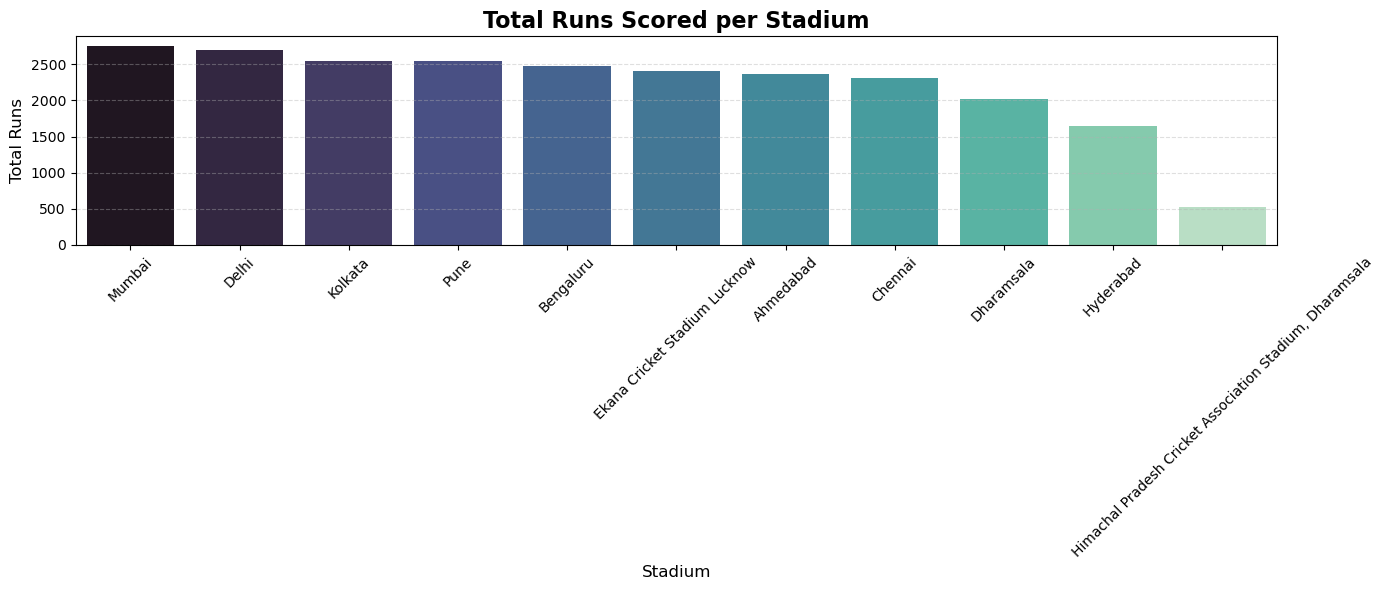

In [247]:
# Visualization: Total runs per stadium
plt.figure(figsize=(14,6))
sns.barplot(data=stadium_runs, x='venue', y='runs',hue='venue',palette='mako',legend=False)
plt.xticks(rotation=45)
plt.title("Total Runs Scored per Stadium", fontsize=16, fontweight='bold')
plt.ylabel("Total Runs", fontsize=12)
plt.xlabel("Stadium", fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()

### 5.2 Average Runs Per Stadium

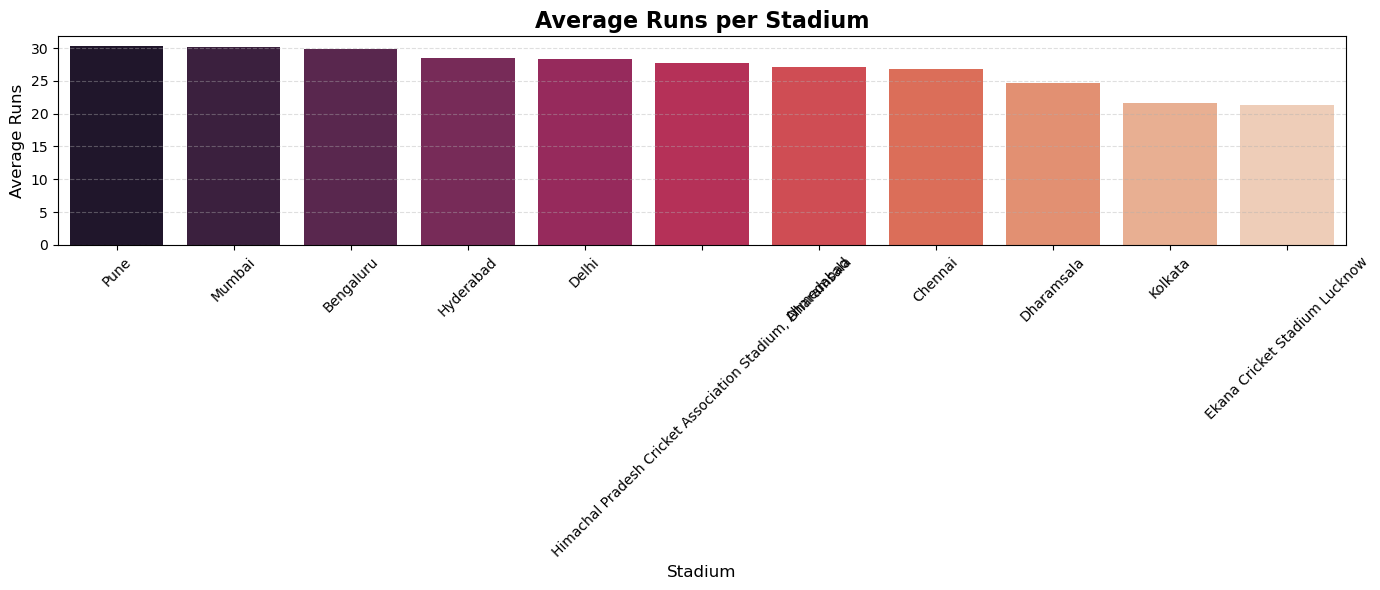

In [257]:
# Visualization: Average runs per stadium
plt.figure(figsize=(14,6))
sns.barplot(data=stadium_avg_runs, x='venue', y='runs', hue='venue',palette='rocket',legend=False)
plt.xticks(rotation=45)
plt.title("Average Runs per Stadium",fontsize=16, fontweight='bold')
plt.ylabel("Average Runs",fontsize=12)
plt.xlabel("Stadium",fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 5.3 Match Outcome Patterns

In [163]:
# Match Outcome Patterns
# Create Win Type column (by runs or wickets)
matches['win_type'] = matches.apply(lambda x: 'Runs' if 'score' in x and pd.notnull(x['scorecardurl']) else 'Wickets', axis=1)
outcome_counts = matches.groupby(['winner','win_type']).size().reset_index(name='count')
print("\nMatch Outcome Patterns:")
print(outcome_counts)


Match Outcome Patterns:
         winner win_type  count
0   Afghanistan  Wickets      4
1     Australia  Wickets      9
2    Bangladesh  Wickets      2
3       England  Wickets      3
4         India  Wickets      9
5   Netherlands  Wickets      2
6   New Zealand  Wickets      5
7      Pakistan  Wickets      4
8  South Africa  Wickets      7
9     Sri Lanka  Wickets      3


### 5.4 Match Outcome By Team

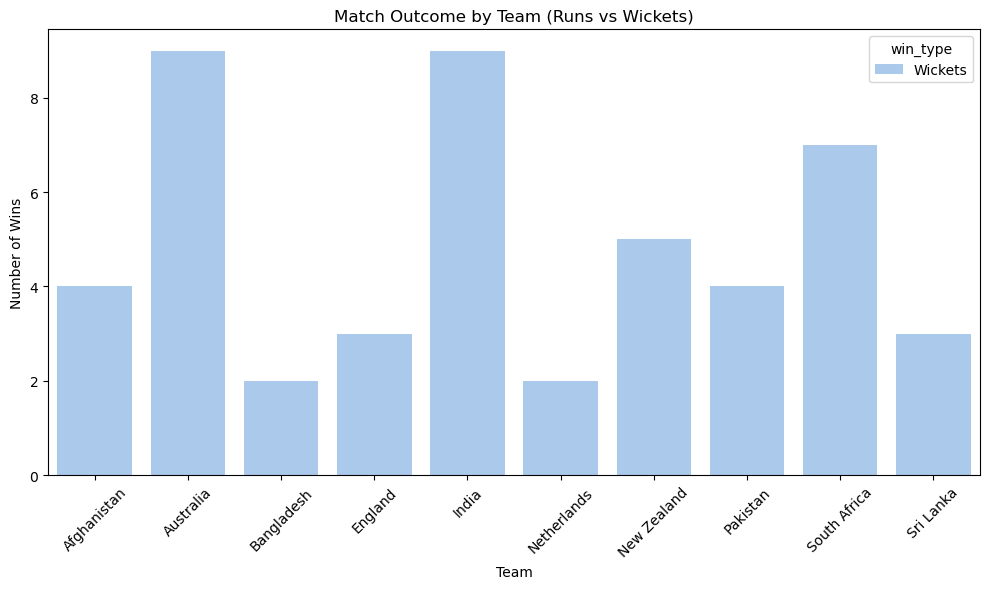

In [267]:
# Outcome by Team
plt.figure(figsize=(10,6))
sns.barplot(data=outcome_counts, x='winner', y='count', hue='win_type', palette="pastel")
plt.title("Match Outcome by Team")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.5 Team Performance at Stadium

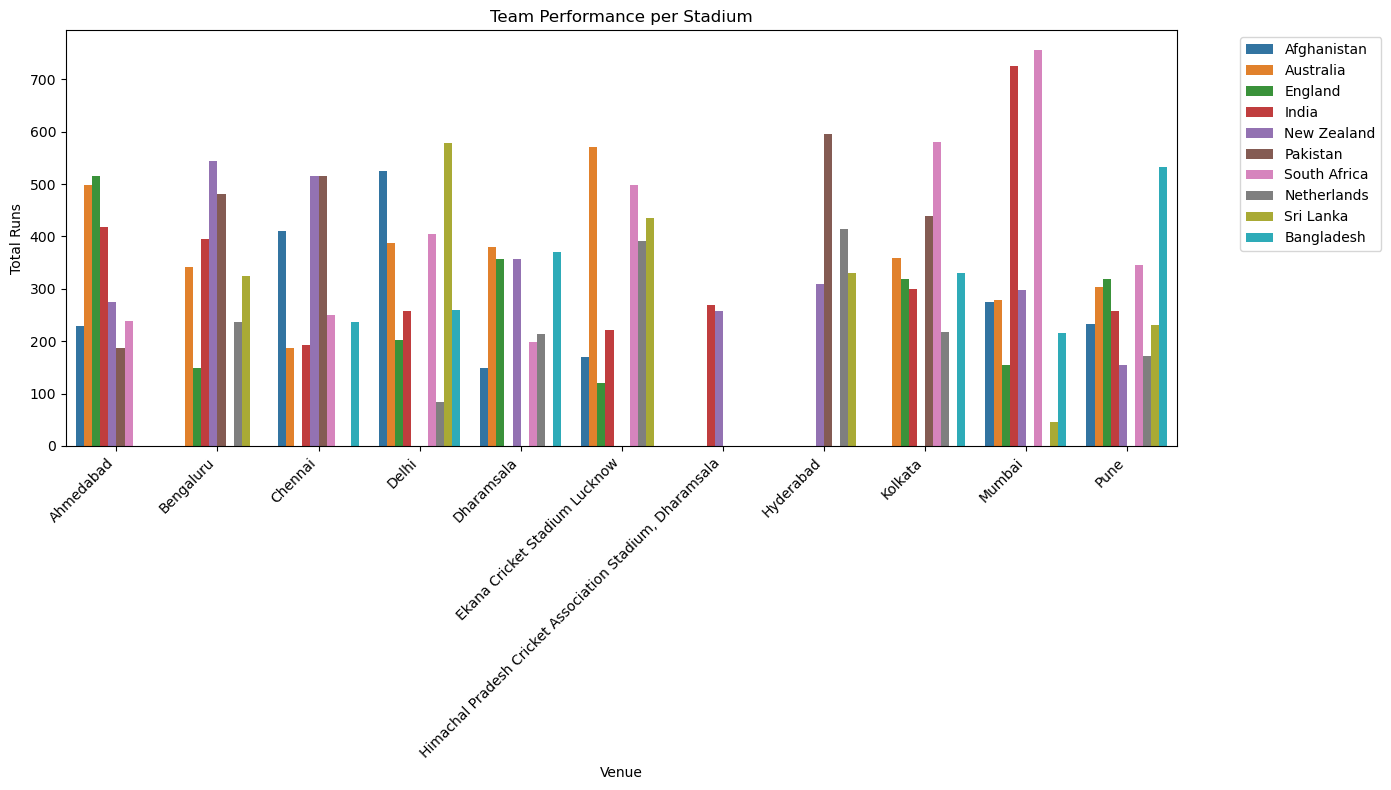

In [289]:
# Team Performance at Stadiums
team_stadium_runs = batting_matches.groupby(['venue','team_innings'])['runs'].sum().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=team_stadium_runs, x='venue', y='runs', hue='team_innings')
plt.title("Team Performance per Stadium")
plt.ylabel("Total Runs")
plt.xlabel("Venue")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


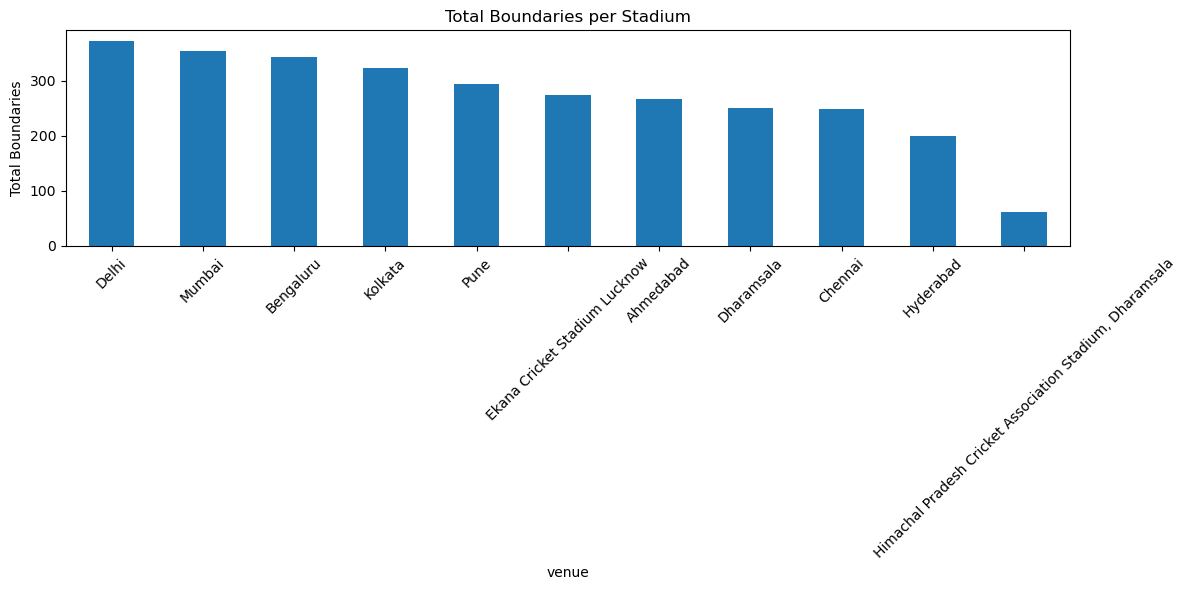

In [294]:
batting_matches['total_boundaries'] = batting_matches['4s'] + batting_matches['6s']

total_boundary_stadium = (
    batting_matches
    .groupby('venue')['total_boundaries']
    .sum()
    .sort_values(ascending=False)
)

total_boundary_stadium.plot(kind='bar', figsize=(12,6))
plt.title("Total Boundaries per Stadium")
plt.ylabel("Total Boundaries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()